# Principal Component Analysis of spatial distribution of the recent Ridgecrest earthquakes

Source of data: https://earthquake.usgs.gov/earthquakes/map/#%7B%22autoUpdate%22%3A%5B%22autoUpdate%22%5D%2C%22basemap%22%3A%22grayscale%22%2C%22feed%22%3A%227day_m25%22%2C%22listFormat%22%3A%22default%22%2C%22mapposition%22%3A%5B%5B34.912962495216966%2C-119.16320800781249%5D%2C%5B36.91696023183306%2C-115.6475830078125%5D%5D%2C%22overlays%22%3A%5B%22plates%22%5D%2C%22restrictListToMap%22%3A%5B%22restrictListToMap%22%5D%2C%22search%22%3Anull%2C%22sort%22%3A%22newest%22%2C%22timezone%22%3A%22utc%22%2C%22viewModes%22%3A%5B%22list%22%2C%22map%22%2C%22settings%22%5D%2C%22event%22%3Anull%7D

Article: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [50]:
import pandas as pd
# hides Jupyter warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv("2.5_month.csv")
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,3121.000000,3121.000000,3121.00000,3121.000000,2015.000000,2935.000000,2919.000000,3121.000000,2912.000000,3121.000000,2800.000000,2931.000000
mean,28.437893,-77.483818,27.79974,3.416299,33.192060,92.014269,1.077598,0.414075,3.056298,3.455963,0.165902,36.083248
std,22.270805,94.976932,73.56651,0.885153,19.029151,68.193381,2.309536,0.336451,4.184220,10.478070,0.127813,51.707651
min,-63.118100,-179.963100,-1.73000,2.450000,2.000000,11.000000,0.000000,0.010000,0.090000,0.000000,0.000000,0.000000
25%,19.757600,-117.726997,2.86000,2.690000,21.000000,50.000000,0.073845,0.170000,0.230000,0.540000,0.107750,17.000000
50%,35.724000,-117.557667,7.44000,3.080000,28.000000,65.000000,0.110600,0.220000,0.350000,0.910000,0.152500,25.000000
75%,35.928833,-80.385300,12.10000,4.200000,45.000000,111.000000,1.226850,0.660000,6.200000,2.000000,0.208000,27.000000
max,84.464200,179.945800,641.95000,7.300000,170.000000,358.000000,30.839000,1.710000,30.570000,365.100000,4.750000,608.000000


In [22]:
from sklearn.preprocessing import StandardScaler
features = ['latitude', 'longitude']
# Separating out the features
x = df.loc[:, features].values
sc = StandardScaler()
x = sc.fit_transform(x)
x[:10]

array([[ 0.34516808, -0.42484684],
       [ 0.33395582, -0.4234673 ],
       [ 0.33062507, -0.42268278],
       [ 0.32974185, -0.42267927],
       [-0.41277656,  0.13229772],
       [ 0.33836738,  1.14322196],
       [-2.21312566,  0.10743928],
       [ 0.21892139, -0.40828221],
       [ 1.48412247, -0.76389081],
       [ 1.35175311, -0.77589249]])

In [28]:
print(sc.mean_, sc.scale_)

[ 28.43789336 -77.4838184 ] [22.26723686 94.96171531]


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.describe()

,pc1,pc2
count,3.121000e+03,3.121000e+03
mean,-1.821321e-17,-1.935153e-17
std,1.161616e+00,8.070244e-01
min,-1.867768e+00,-3.141517e+00
25%,-5.364741e-01,-1.042852e-01
50%,-5.284050e-01,6.337860e-02
75%,3.943101e-01,6.888521e-02
max,4.062580e+00,3.503867e+00


In [32]:
print(pca.singular_values_, pca.components_)

[64.88436097 45.0779292 ] [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


Geo Pandas: https://www.datacamp.com/community/tutorials/geospatial-data-python

In [1]:
import geopandas
country = geopandas.read_file("gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"(POLYGON ((-88.124658 30.28364, -88.0868119999..."
1,0400000US02,02,Alaska,,570640.950,"(POLYGON ((-166.10574 53.988606, -166.075283 5..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.538593 37.000674, -112.534545 3..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.042964 33.019219, -94.043036 33...."
4,0400000US06,06,California,,155779.220,"(POLYGON ((-122.421439 37.869969, -122.421341 ..."


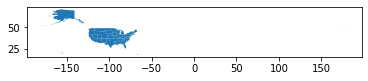

In [3]:
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
country.plot()

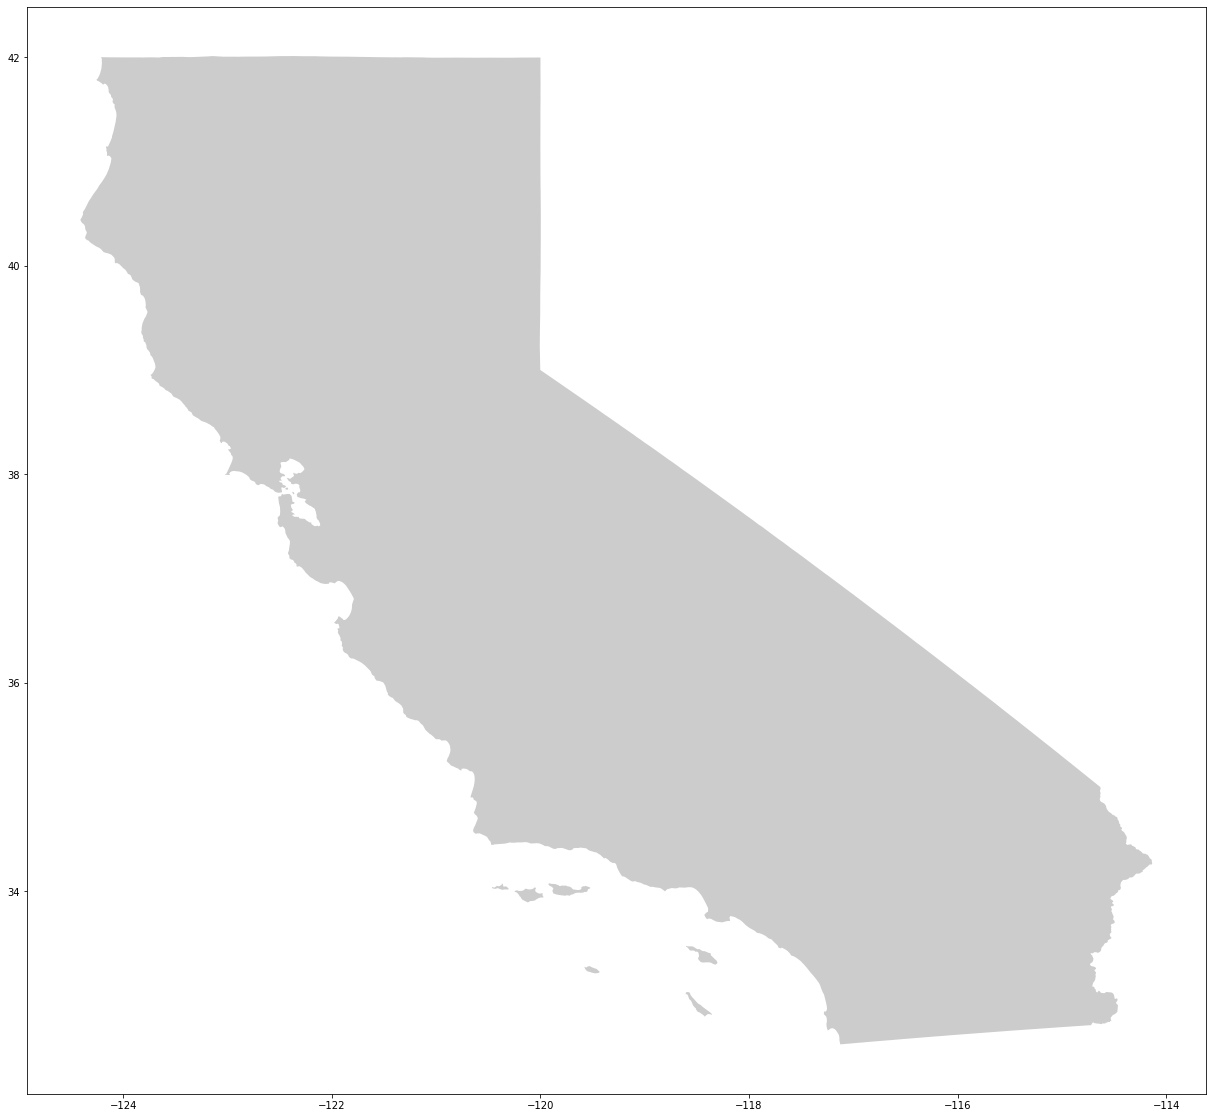

In [12]:
country[country['NAME'].isin(['California']) == True].plot(figsize=(30,20), color='#CCCCCC');

In [34]:
qk = geopandas.read_file("2.5_month.geojson")
qk.head()

,id,mag,place,time,updated,tz,url,detail,felt,cdi,...,nst,dmin,rms,gap,magType,type,title,geometry,lat,lon
0,ci38600815,3.28,"14km NE of Coso Junction, CA",1563504733590,1563504868134,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,48.0,0.02262,0.18,51.0,ml,earthquake,"M 3.3 - 14km NE of Coso Junction, CA",POINT Z (-117.8280029 36.1238327 2.86),-117.828003,36.123833
1,ci38600727,2.58,"20km ESE of Little Lake, CA",1563503808010,1563504481630,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,33.0,0.08560,0.16,48.0,ml,earthquake,"M 2.6 - 20km ESE of Little Lake, CA",POINT Z (-117.697 35.8741667 7.5),-117.697000,35.874167
2,ci38600703,2.47,"20km W of Searles Valley, CA",1563503614080,1563503842559,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,26.0,0.02568,0.20,55.0,ml,earthquake,"M 2.5 - 20km W of Searles Valley, CA",POINT Z (-117.6225 35.8 7.25),-117.622500,35.800000
3,ci38600551,2.48,"18km NNE of Ridgecrest, CA",1563501912470,1563502558770,-480,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,34.0,0.04062,0.16,60.0,ml,earthquake,"M 2.5 - 18km NNE of Ridgecrest, CA",POINT Z (-117.6221667 35.7803333 9.83),-117.622167,35.780333
4,pr2019200000,2.86,"98km NNW of Road Town, British Virgin Islands",1563500165820,1563502053040,-240,https://earthquake.usgs.gov/earthquakes/eventp...,https://earthquake.usgs.gov/earthquakes/feed/v...,NaN,NaN,...,9.0,1.44260,0.35,339.0,md,earthquake,"M 2.9 - 98km NNW of Road Town, British Virgin ...",POINT Z (-64.92059999999999 19.2465 35),-64.920600,19.246500


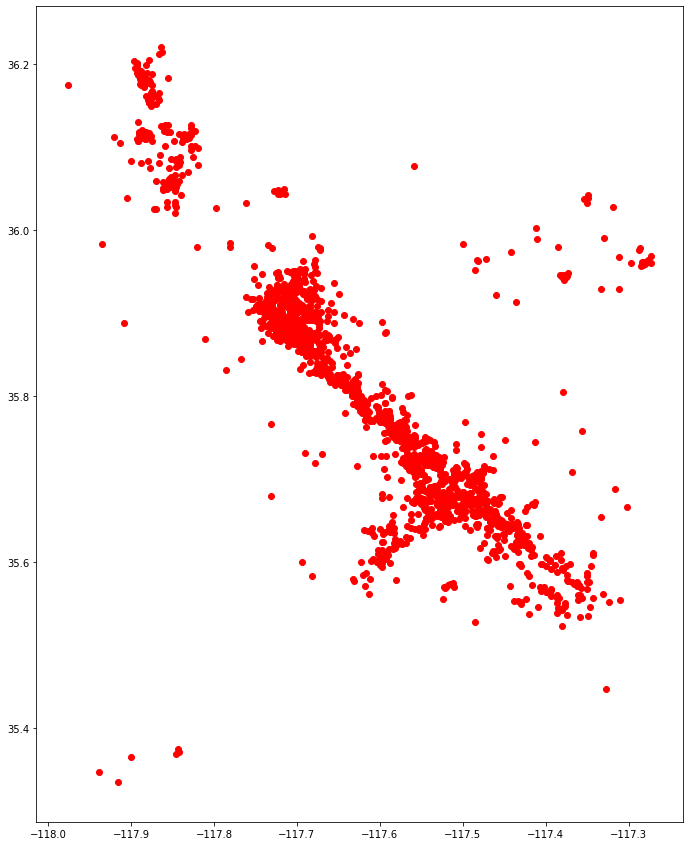

In [44]:
qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)].plot(figsize=(20,15), color='#FF0000');

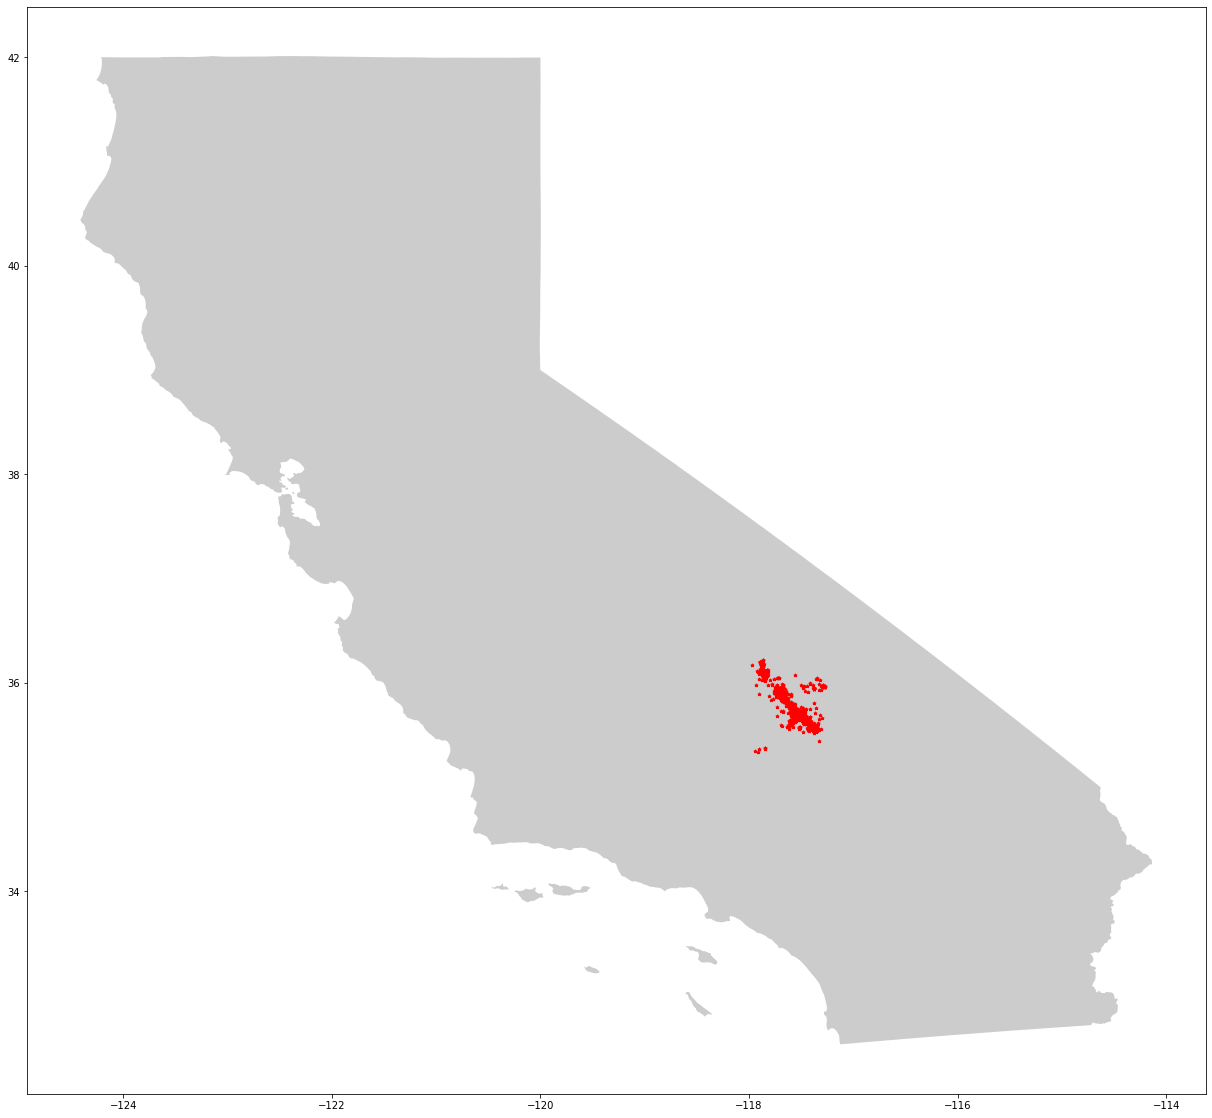

In [45]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['California']) == True].plot(ax=ax, color='#CCCCCC')

# plotting the hurricane position on top with red color to stand out:
qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)].plot(ax=base, color='red', marker="*", markersize=10);

In [ ]:
qk['lat'] = qk['geometry'].x
qk['lon'] = qk['geometry'].y

In [47]:
from sklearn.preprocessing import StandardScaler
features = ['lat', 'lon']
# Separating out the features
cali = qk[(qk.geometry.x < -116.4) & (qk.geometry.y > 35.0)].loc[(qk.geometry.x > -118.67) & (qk.geometry.y < 36.4)]
x = cali.loc[:, features].values
sc = StandardScaler()
x = sc.fit_transform(x)
x[:10]

array([[-1.55601705,  2.050333  ],
       [-0.6006456 ,  0.4428277 ],
       [-0.0573357 , -0.03470374],
       [-0.05490503, -0.16133021],
       [-0.38186309,  0.24323038],
       [ 1.30640059,  0.7003649 ],
       [ 1.07666582, -1.00156796],
       [-1.58273623,  1.96985408],
       [-0.06950293, -0.12484897],
       [-1.98262179,  1.9687814 ]])

In [48]:
print(sc.mean_, sc.scale_)

[-117.61463799   35.80538993] [0.13712248 0.15531271]


In [51]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principalDf.describe()

,pc1,pc2
count,1725.000000,1.725000e+03
mean,0.000000,8.238177e-18
std,1.336908,4.624261e-01
min,-3.114195,-2.538789e+00
25%,-1.047595,-1.013896e-01
50%,-0.194432,4.001153e-02
75%,0.942835,1.492870e-01
max,3.548389,3.756830e+00


In [53]:
print(pca.singular_values_, pca.components_)

[55.5098502  19.20043048] [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]


Reverse transformation / reconstruction:
https://stats.stackexchange.com/questions/229092/how-to-reverse-pca-and-reconstruct-original-variables-from-several-principal-com

https://stackoverflow.com/questions/36566844/pca-projection-and-reconstruction-in-scikit-learn

In [52]:
pca.transform([0, 0])

ValueError: Expected 2D array, got 1D array instead:
array=[0 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.